## Recommender

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
books=pd.read_csv('Data/books.csv')
users=pd.read_csv('Data/users.csv')
ratings=pd.read_csv('Data/ratings.csv')

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
books.shape

(271360, 8)

In [8]:
ratings.shape

(1149780, 3)

In [9]:
users.shape

(278858, 3)

#### Finding Null Values in our data

In [10]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [11]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [12]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [13]:
books=books.dropna()

In [14]:
users=users.dropna()

In [15]:
ratings=ratings.dropna()

In [16]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271354, 8)
(168096, 3)
(1149780, 3)


#### Finding Duplicates in our data

In [17]:
books.duplicated().sum()

0

In [18]:
users.duplicated().sum()

0

In [19]:
ratings.duplicated().sum()

0

In [20]:
np.sort(ratings['Book-Rating'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [21]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  object
 4   Publisher            271354 non-null  object
 5   Image-URL-S          271354 non-null  object
 6   Image-URL-M          271354 non-null  object
 7   Image-URL-L          271354 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB


In [22]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [23]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype('int32')

In [24]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  int32 
 4   Publisher            271354 non-null  object
 5   Image-URL-S          271354 non-null  object
 6   Image-URL-M          271354 non-null  object
 7   Image-URL-L          271354 non-null  object
dtypes: int32(1), object(7)
memory usage: 17.6+ MB


In [25]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [26]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168096 entries, 1 to 278854
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   168096 non-null  int64  
 1   Location  168096 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ MB


## Popularity based Recommender System

In [27]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [28]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


#### Joining books and rating into one table

In [29]:
books_with_ratings=ratings.merge(books,on="ISBN")

In [30]:
books_with_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [31]:
books_with_ratings.shape

(1031129, 10)

In [32]:
popular_df=books_with_ratings.groupby('Book-Title').agg(num_ratings=('Book-Rating','count'),avg_rating=('Book-Rating','mean'))

In [33]:
popular_df=popular_df.reset_index()

In [34]:
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241061,Ã?Â?lpiraten.,2,0.000000
241062,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241063,Ã?Â?sterlich leben.,1,7.000000
241064,Ã?Â?stlich der Berge.,3,2.666667


In [35]:
popular_df.sort_values('num_ratings',ascending=False)

,Book-Title,num_ratings,avg_rating
234946,Wild Animus,2502,1.019584
196322,The Lovely Bones: A Novel,1295,4.468726
183569,The Da Vinci Code,898,4.642539
5303,A Painted House,838,3.231504
199233,The Nanny Diaries: A Novel,828,3.530193
...,...,...,...
147558,"Real Marriage Material (Silhouette Romance, No...",1,0.000000
63663,Fabulous Fragrances II : A Guide to Prestige P...,1,10.000000
147556,Real Love: The Truth About Finding Uncondition...,1,0.000000
147555,Real Love: The Drawings for Sean,1,10.000000


In [36]:
popular_df=popular_df[popular_df['num_ratings']>300].sort_values('avg_rating',ascending=False)

In [37]:
popular_df

,Book-Title,num_ratings,avg_rating
80432,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80420,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80424,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80412,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
187373,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
...,...,...,...
233508,While I Was Gone,431,2.580046
201921,The Perfect Storm : A True Story of Men Agains...,404,2.539604
4808,A Map of the World,327,2.492355
52407,Disclosure,318,2.345912


In [38]:
popular_df=popular_df.head(50)

In [39]:
popular_df

,Book-Title,num_ratings,avg_rating
80432,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80420,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80424,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80412,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
187373,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80443,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
219737,To Kill a Mockingbird,510,4.700000
183569,The Da Vinci Code,898,4.642539
187876,The Five People You Meet in Heaven,430,4.551163
180553,The Catcher in the Rye,449,4.545657


## Model Deployment

In [40]:
popular_df=popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [41]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
12,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
21,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
23,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000
31,The Da Vinci Code,Dan Brown,http://images.amazon.com/images/P/0385504209.0...,898,4.642539
37,The Five People You Meet in Heaven,Mitch Albom,http://images.amazon.com/images/P/0786868716.0...,430,4.551163
39,The Catcher in the Rye,J.D. Salinger,http://images.amazon.com/images/P/0316769487.0...,449,4.545657


## Colaborative Filtering

### 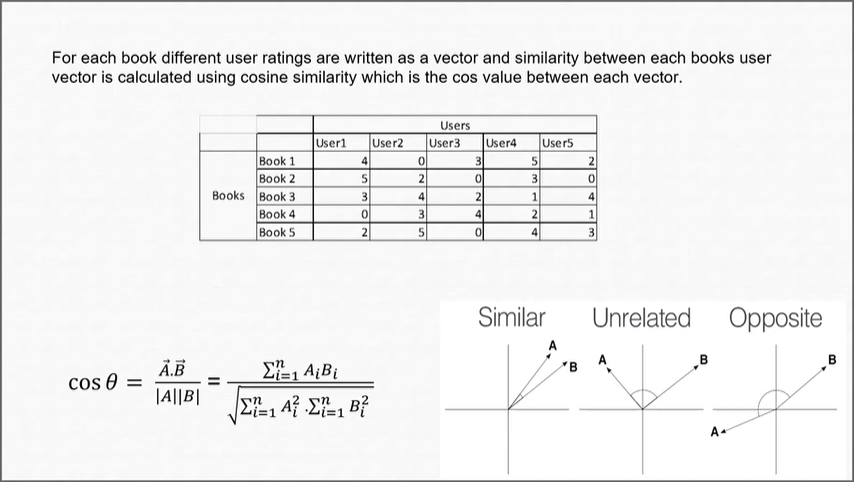
Similar book predictions based on user's feedback

In [42]:
books_with_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [43]:
x=books_with_ratings.groupby('User-ID').count()

In [44]:
x

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
User-ID,,,,,,,,,
2,1,1,1,1,1,1,1,1,1
8,17,17,17,17,17,17,17,17,17
9,3,3,3,3,3,3,3,3,3
10,1,1,1,1,1,1,1,1,1
12,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
278846,1,1,1,1,1,1,1,1,1
278849,4,4,4,4,4,4,4,4,4
278851,23,23,23,23,23,23,23,23,23


In [45]:
x.index

Int64Index([     2,      8,      9,     10,     12,     14,     16,     17,
                19,     20,
            ...
            278832, 278836, 278838, 278843, 278844, 278846, 278849, 278851,
            278852, 278854],
           dtype='int64', name='User-ID', length=92106)

In [46]:
x.shape

(92106, 9)

In [47]:
x=x['Book-Rating']>200
x

User-ID
2         False
8         False
9         False
10        False
12        False
          ...  
278846    False
278849    False
278851    False
278852    False
278854    False
Name: Book-Rating, Length: 92106, dtype: bool

In [48]:
power_users=x[x].index
power_users

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [49]:
power_users.sort_values()
power_users

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [50]:
filtered_ratings=books_with_ratings[books_with_ratings['User-ID'].isin(power_users)]

In [51]:
filtered_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030876,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030877,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030878,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030879,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


In [52]:
y=filtered_ratings.groupby('Book-Title').count()

In [53]:
y

,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
Book-Title,,,,,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2,2,2,2,2,2,2,2,2
Always Have Popsicles,1,1,1,1,1,1,1,1,1
Apple Magic (The Collector's series),1,1,1,1,1,1,1,1,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,1,1,1,1,1,1,1,1,1
Clifford Visita El Hospital (Clifford El Gran Perro Colorado),1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
Ã?Â?ber das Fernsehen.,2,2,2,2,2,2,2,2,2
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.,3,3,3,3,3,3,3,3,3
Ã?Â?lpiraten.,1,1,1,1,1,1,1,1,1


In [54]:
y.sort_values('User-ID',ascending=False)

,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
Book-Title,,,,,,,,,
Wild Animus,330,330,330,330,330,330,330,330,330
Bridget Jones's Diary,263,263,263,263,263,263,263,263,263
The Lovely Bones: A Novel,261,261,261,261,261,261,261,261,261
The Notebook,238,238,238,238,238,238,238,238,238
The Pelican Brief,229,229,229,229,229,229,229,229,229
...,...,...,...,...,...,...,...,...,...
Ladylord,1,1,1,1,1,1,1,1,1
Ladykiller,1,1,1,1,1,1,1,1,1
Ladyfingers and Nun's Tummies: From Spare Ribs to Humble Pie-A Lightearted Look at How Food Got Their Names,1,1,1,1,1,1,1,1,1


In [55]:
y=y['User-ID']>50

In [56]:
y

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    False
 Always Have Popsicles                                                                                        False
 Apple Magic (The Collector's series)                                                                         False
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   False
 Clifford Visita El Hospital (Clifford El Gran Perro Colorado)                                                False
                                                                                                              ...  
Ã?Â?ber das Fernsehen.                                                                                        False
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.                                                           False
Ã?Â?lpiraten.                                                

In [57]:
famous_books=y[y].index

In [58]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=679)

In [59]:
final_ratings=filtered_ratings[filtered_ratings['Book-Title'].isin(famous_books)]

In [60]:
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026717,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027916,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028770,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029063,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


#### Creating a Pivot Table for ratings for given by each user for each book

In [61]:
pt=final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [62]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [63]:
pt=pt.fillna(0)

In [64]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
similarity_scores=cosine_similarity(pt)

In [66]:
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [67]:
df_temp=pd.DataFrame(similarity_scores)

In [68]:
df_temp

,0,1,2,3,4,5,6,7,8,9,...,669,670,671,672,673,674,675,676,677,678
0,1.000000,0.102550,0.012209,0.000000,0.053672,0.027749,0.082165,0.137329,0.032617,0.036676,...,0.052372,0.011402,0.009687,0.125306,0.009099,0.058641,0.017696,0.121104,0.073476,0.043160
1,0.102550,1.000000,0.236457,0.000000,0.109538,0.100929,0.117862,0.187620,0.096589,0.047161,...,0.066278,0.077286,0.152550,0.084055,0.063633,0.052353,0.193097,0.074461,0.167739,0.142634
2,0.012209,0.236457,1.000000,0.000000,0.069090,0.105591,0.000000,0.107744,0.067022,0.041682,...,0.153473,0.183089,0.019906,0.148580,0.018697,0.068549,0.165654,0.045588,0.049386,0.107961
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.111582,0.000000,0.000000,0.074396,0.000000,...,0.000000,0.000000,0.000000,0.011948,0.123486,0.108638,0.076242,0.000000,0.000000,0.000000
4,0.053672,0.109538,0.069090,0.000000,1.000000,0.101331,0.096270,0.039933,0.074522,0.000000,...,0.076387,0.082158,0.022133,0.075816,0.025587,0.000000,0.098488,0.040017,0.112841,0.015204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,0.058641,0.052353,0.068549,0.108638,0.000000,0.064919,0.000000,0.131434,0.126245,0.072397,...,0.181184,0.000000,0.000000,0.000000,0.071845,1.000000,0.000000,0.000000,0.081330,0.000000
675,0.017696,0.193097,0.165654,0.076242,0.098488,0.119383,0.080976,0.052059,0.097149,0.169927,...,0.202358,0.159737,0.028853,0.061184,0.027101,0.000000,1.000000,0.052168,0.194303,0.190658
676,0.121104,0.074461,0.045588,0.000000,0.040017,0.094787,0.042405,0.051525,0.197962,0.000000,...,0.039791,0.048550,0.028558,0.198973,0.026824,0.000000,0.052168,1.000000,0.070851,0.019618
677,0.073476,0.167739,0.049386,0.000000,0.112841,0.112250,0.153617,0.070702,0.131941,0.087917,...,0.110764,0.046122,0.039187,0.083096,0.036807,0.081330,0.194303,0.070851,1.000000,0.106030


In [69]:
pt.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=679)

In [70]:
df_temp_name=df_temp

In [71]:
df_temp_name.index=pt.index
df_temp_name.columns=pt.index

In [72]:
df_temp_name

Book-Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,A Fine Balance,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,1.000000,0.102550,0.012209,0.000000,0.053672,0.027749,0.082165,0.137329,0.032617,0.036676,...,0.052372,0.011402,0.009687,0.125306,0.009099,0.058641,0.017696,0.121104,0.073476,0.043160
1st to Die: A Novel,0.102550,1.000000,0.236457,0.000000,0.109538,0.100929,0.117862,0.187620,0.096589,0.047161,...,0.066278,0.077286,0.152550,0.084055,0.063633,0.052353,0.193097,0.074461,0.167739,0.142634
2nd Chance,0.012209,0.236457,1.000000,0.000000,0.069090,0.105591,0.000000,0.107744,0.067022,0.041682,...,0.153473,0.183089,0.019906,0.148580,0.018697,0.068549,0.165654,0.045588,0.049386,0.107961
4 Blondes,0.000000,0.000000,0.000000,1.000000,0.000000,0.111582,0.000000,0.000000,0.074396,0.000000,...,0.000000,0.000000,0.000000,0.011948,0.123486,0.108638,0.076242,0.000000,0.000000,0.000000
A Bend in the Road,0.053672,0.109538,0.069090,0.000000,1.000000,0.101331,0.096270,0.039933,0.074522,0.000000,...,0.076387,0.082158,0.022133,0.075816,0.025587,0.000000,0.098488,0.040017,0.112841,0.015204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.058641,0.052353,0.068549,0.108638,0.000000,0.064919,0.000000,0.131434,0.126245,0.072397,...,0.181184,0.000000,0.000000,0.000000,0.071845,1.000000,0.000000,0.000000,0.081330,0.000000
You Belong To Me,0.017696,0.193097,0.165654,0.076242,0.098488,0.119383,0.080976,0.052059,0.097149,0.169927,...,0.202358,0.159737,0.028853,0.061184,0.027101,0.000000,1.000000,0.052168,0.194303,0.190658
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.121104,0.074461,0.045588,0.000000,0.040017,0.094787,0.042405,0.051525,0.197962,0.000000,...,0.039791,0.048550,0.028558,0.198973,0.026824,0.000000,0.052168,1.000000,0.070851,0.019618


In [73]:
def recommend(book_name):
    index=np.where(pt.index==book_name)[0][0]
    similar_items=sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    data=[]
    for i in similar_items:
        item=[]
        temp_df=books[books['Book-Title']==pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        data.append(item)
    return data

In [74]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']]

## Export Data and Model to pkl

In [75]:
import pickle as pkl
pkl.dump(popular_df,open('popular.pkl','wb'))

In [76]:
pkl.dump(books,open('books.pkl','wb'))
pkl.dump(pt,open('pt.pkl','wb'))
pkl.dump(similarity_scores,open('similarity_scores.pkl','wb'))